# <font color=blue>Assignments for "Data Exploration - Univariate Analysis"</font>

In this assignment, you will continue to study the data of the `US Education System` ([dataset](https://www.kaggle.com/spscientist/students-performance-in-exams/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci
import warnings

warnings.filterwarnings("ignore")

**(1)** Interpret the data by making univariate analysis and indicate the points you consider important.

***How many variables do we have?
<Br>
How many data points are there in the dataset?
    <Br>
Which variables are continuous and which are categorical?
        <Br>
Is there any missing data? If so, how much?
            <Br>
Does any of the variables have a known probability distribution (normal, Poisson, Gamma, etc.)?
                <Br>
What are the central tendencies of each of the variables?
                    <Br>
How many variances are there in each variable?***

In [2]:
edu = pd.read_csv(r"C:\Users\Kleerys\Desktop\Career\1.1-Python\1.1-DataSets\StudentsPerformance.csv")

In [3]:
display(edu.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
print(edu.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


***Our dataset has only three integer features, to describe all features we need to convert them into any non-object type.***

In [5]:
eduCopy = edu

In [6]:
#changing gender
edu.gender = pd.get_dummies(edu.gender, drop_first = True)

In [7]:
edu.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,standard,none,72,72,74
1,0,group C,some college,standard,completed,69,90,88
2,0,group B,master's degree,standard,none,90,95,93
3,1,group A,associate's degree,free/reduced,none,47,57,44
4,1,group C,some college,standard,none,76,78,75


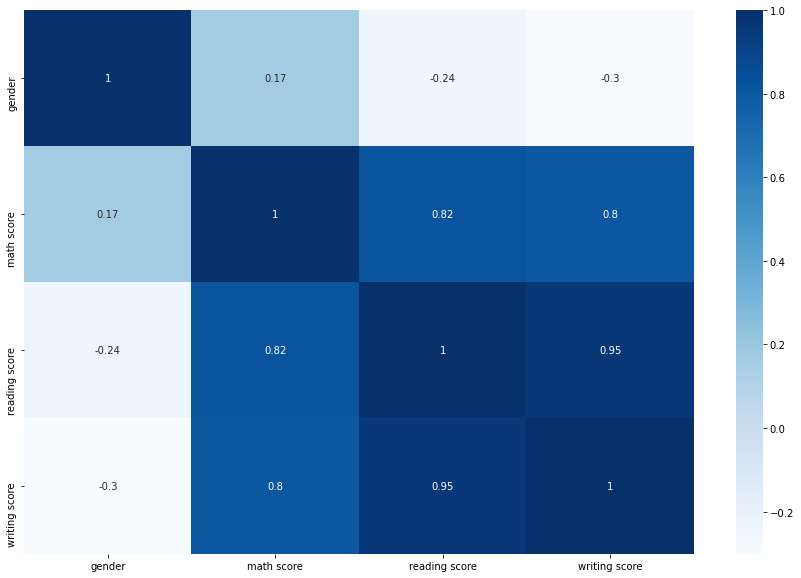

In [8]:
plt.figure(figsize = (15,10))
sns.heatmap(edu.corr(), cmap = "Blues", annot = True)
plt.show()

In [9]:
edu.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

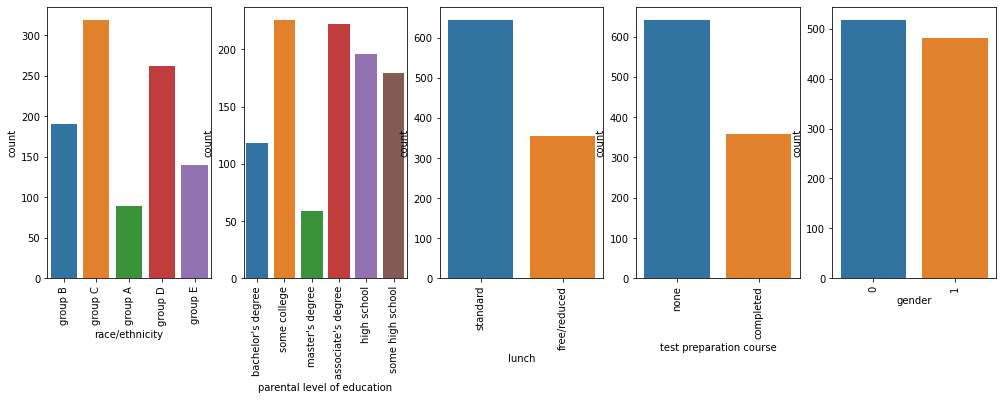

In [10]:
plt.figure(figsize = (17,5))
plt.subplot(1, 5, 1)
sns.countplot(edu["race/ethnicity"])
plt.xticks(rotation=90)
plt.subplot(1, 5, 2)
sns.countplot(edu["parental level of education"])
plt.xticks(rotation=90)
plt.subplot(1, 5, 3)
sns.countplot(edu["lunch"])
plt.xticks(rotation=90)
plt.subplot(1, 5, 4)
sns.countplot(edu["test preparation course"])
plt.xticks(rotation=90)
plt.subplot(1, 5, 5)
sns.countplot(edu["gender"])
plt.xticks(rotation=90)
plt.show()

**(2)** Consider a state (eg California) and plot the yearly change of total revenues and total spending. Do these two variables change by years? Do you have years of summit and bottom?

In [11]:
states = pd.read_csv(r"C:\Users\Kleerys\Desktop\Career\1.1-Python\1.1-DataSets\states_all.csv")

In [12]:
statesCal = states[states["STATE"] == "CALIFORNIA"]
statesCal.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
55,1993_CALIFORNIA,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,...,420233.0,380223.0,277271.0,NaN,NaN,5327231.0,NaN,NaN,NaN,NaN
106,1994_CALIFORNIA,CALIFORNIA,1994,4120498.0,23440845.0,2095878.0,13175550.0,8169417.0,23012688.0,12443864.0,...,426919.0,388561.0,285132.0,NaN,NaN,5407475.0,NaN,NaN,197.0,NaN
157,1995_CALIFORNIA,CALIFORNIA,1995,5299405.0,29512214.0,2612241.0,15541486.0,11358487.0,30097549.0,16146416.0,...,428553.0,399039.0,287428.0,NaN,NaN,5536406.0,NaN,NaN,NaN,NaN
208,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,435217.0,406456.0,298669.0,NaN,NaN,5686198.0,NaN,NaN,NaN,NaN


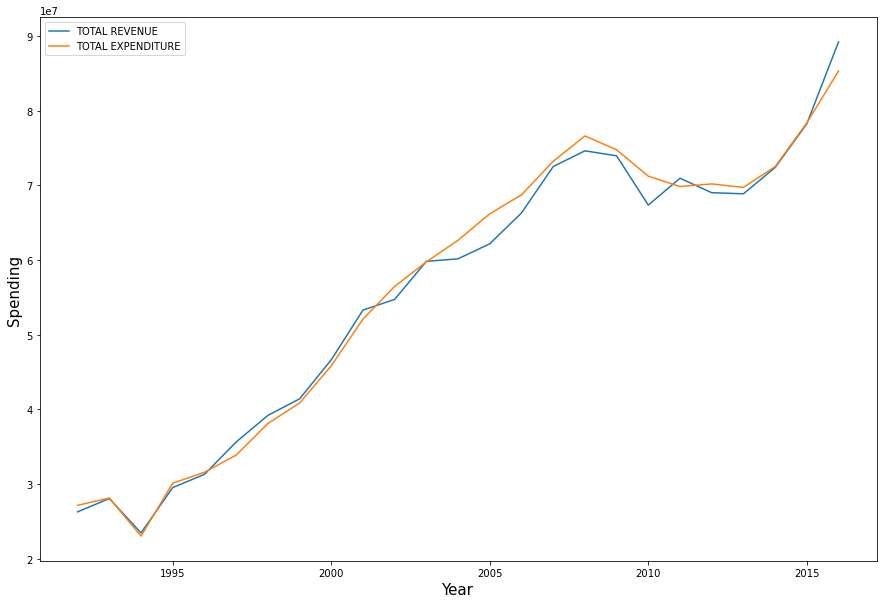

In [13]:
plt.figure(figsize = (15,10))
sns.lineplot(data = statesCal, x = "YEAR", y = "TOTAL_REVENUE")
sns.lineplot(data = statesCal, x = "YEAR", y = "TOTAL_EXPENDITURE")
plt.ylabel("Spending", fontsize = 15)
plt.xlabel("Year", fontsize = 15)
plt.legend(["TOTAL REVENUE", "TOTAL EXPENDITURE"])
plt.show()

***These two features has summit in the same year and it is 2017. Also their lowest points are in the same year and it's 1993.***

**(3)** In which course are students more successful in your chosen state? Mathematics or reading?

In [18]:
statesCal["AVG_MATH_4_SCORE"] = statesCal["AVG_MATH_4_SCORE"].sort_values()
statesCal["AVG_MATH_8_SCORE"] = statesCal["AVG_MATH_8_SCORE"].sort_values()
statesCal["AVG_READING_4_SCORE"] = statesCal["AVG_READING_4_SCORE"].sort_values()
statesCal["AVG_READING_8_SCORE"] = statesCal["AVG_READING_8_SCORE"].sort_values()

In [19]:
statesCal.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
55,1993_CALIFORNIA,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,...,420233.0,380223.0,277271.0,NaN,NaN,5327231.0,NaN,NaN,NaN,NaN
106,1994_CALIFORNIA,CALIFORNIA,1994,4120498.0,23440845.0,2095878.0,13175550.0,8169417.0,23012688.0,12443864.0,...,426919.0,388561.0,285132.0,NaN,NaN,5407475.0,NaN,NaN,197.0,NaN
157,1995_CALIFORNIA,CALIFORNIA,1995,5299405.0,29512214.0,2612241.0,15541486.0,11358487.0,30097549.0,16146416.0,...,428553.0,399039.0,287428.0,NaN,NaN,5536406.0,NaN,NaN,NaN,NaN
208,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,435217.0,406456.0,298669.0,NaN,NaN,5686198.0,NaN,NaN,NaN,NaN


***In the state i choose, average math score slightly better than reading.***

**(4)** What is the distribution of mathematics and reading grades?

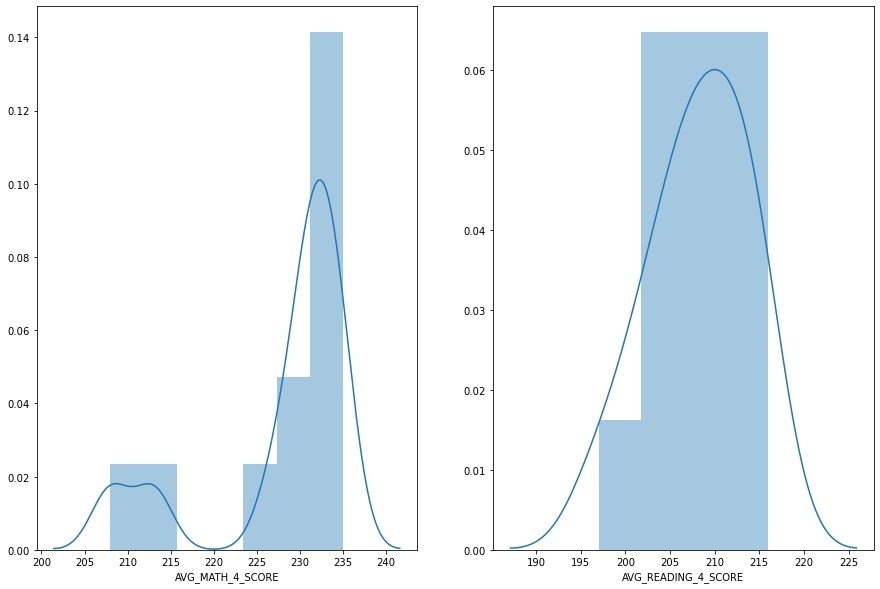

In [21]:
plt.figure(figsize= (15,10))
plt.subplot(1,2,1)
sns.distplot(statesCal["AVG_MATH_4_SCORE"])
plt.subplot(1,2,2)
sns.distplot(statesCal["AVG_READING_4_SCORE"])
plt.show()

***They distributed somehow. I don't think there is a name for it.***

**(5)** You may have noticed that there are many missing values in the mathematics and reading notes. Complete the missing values with mean, median, and interpolation. Compare the impact of these techniques on the distribution of grades.

In [22]:
print(statesCal.isnull().sum())

PRIMARY_KEY                      0
STATE                            0
YEAR                             0
ENROLL                           9
TOTAL_REVENUE                    8
FEDERAL_REVENUE                  8
STATE_REVENUE                    8
LOCAL_REVENUE                    8
TOTAL_EXPENDITURE                8
INSTRUCTION_EXPENDITURE          8
SUPPORT_SERVICES_EXPENDITURE     8
OTHER_EXPENDITURE                9
CAPITAL_OUTLAY_EXPENDITURE       8
GRADES_PK_G                      8
GRADES_KG_G                      1
GRADES_4_G                       1
GRADES_8_G                       1
GRADES_12_G                      1
GRADES_1_8_G                    13
GRADES_9_12_G                   12
GRADES_ALL_G                     1
AVG_MATH_4_SCORE                22
AVG_MATH_8_SCORE                21
AVG_READING_4_SCORE             20
AVG_READING_8_SCORE             22
dtype: int64


In [25]:
#Filling with mean
for col in ["AVG_MATH_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_4_SCORE","AVG_READING_8_SCORE"]:
    statesCal[col] = statesCal.groupby("STATE").transform(lambda x: x.fillna(x.mean()))[col]

In [26]:
statesCal.isnull().sum()

PRIMARY_KEY                      0
STATE                            0
YEAR                             0
ENROLL                           9
TOTAL_REVENUE                    8
FEDERAL_REVENUE                  8
STATE_REVENUE                    8
LOCAL_REVENUE                    8
TOTAL_EXPENDITURE                8
INSTRUCTION_EXPENDITURE          8
SUPPORT_SERVICES_EXPENDITURE     8
OTHER_EXPENDITURE                9
CAPITAL_OUTLAY_EXPENDITURE       8
GRADES_PK_G                      8
GRADES_KG_G                      1
GRADES_4_G                       1
GRADES_8_G                       1
GRADES_12_G                      1
GRADES_1_8_G                    13
GRADES_9_12_G                   12
GRADES_ALL_G                     1
AVG_MATH_4_SCORE                 0
AVG_MATH_8_SCORE                 0
AVG_READING_4_SCORE              0
AVG_READING_8_SCORE              0
dtype: int64

In [27]:
states = pd.read_csv(r"C:\Users\Kleerys\Desktop\Career\1.1-Python\1.1-DataSets\states_all.csv")

In [28]:
statesCal = states[states["STATE"] == "CALIFORNIA"]

In [29]:
#Filling with median
for col in ["AVG_MATH_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_4_SCORE","AVG_READING_8_SCORE"]:
    statesCal[col] = statesCal.groupby("STATE").transform(lambda x: x.fillna(x.median()))[col]

In [30]:
statesCal.isnull().sum()

PRIMARY_KEY                      0
STATE                            0
YEAR                             0
ENROLL                           9
TOTAL_REVENUE                    8
FEDERAL_REVENUE                  8
STATE_REVENUE                    8
LOCAL_REVENUE                    8
TOTAL_EXPENDITURE                8
INSTRUCTION_EXPENDITURE          8
SUPPORT_SERVICES_EXPENDITURE     8
OTHER_EXPENDITURE                9
CAPITAL_OUTLAY_EXPENDITURE       8
GRADES_PK_G                      8
GRADES_KG_G                      1
GRADES_4_G                       1
GRADES_8_G                       1
GRADES_12_G                      1
GRADES_1_8_G                    13
GRADES_9_12_G                   12
GRADES_ALL_G                     1
AVG_MATH_4_SCORE                 0
AVG_MATH_8_SCORE                 0
AVG_READING_4_SCORE              0
AVG_READING_8_SCORE              0
dtype: int64

In [39]:
states = pd.read_csv(r"C:\Users\Kleerys\Desktop\Career\1.1-Python\1.1-DataSets\states_all.csv")

In [40]:
statesCal = states[states["STATE"] == "CALIFORNIA"]

In [41]:
#Filling with median
for col in ["AVG_MATH_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_4_SCORE","AVG_READING_8_SCORE"]:
    statesCal[col].interpolate(inplace = True, method = "pad")

In [42]:
statesCal.isnull().sum()

PRIMARY_KEY                      0
STATE                            0
YEAR                             0
ENROLL                           9
TOTAL_REVENUE                    8
FEDERAL_REVENUE                  8
STATE_REVENUE                    8
LOCAL_REVENUE                    8
TOTAL_EXPENDITURE                8
INSTRUCTION_EXPENDITURE          8
SUPPORT_SERVICES_EXPENDITURE     8
OTHER_EXPENDITURE                9
CAPITAL_OUTLAY_EXPENDITURE       8
GRADES_PK_G                      8
GRADES_KG_G                      1
GRADES_4_G                       1
GRADES_8_G                       1
GRADES_12_G                      1
GRADES_1_8_G                    13
GRADES_9_12_G                   12
GRADES_ALL_G                     1
AVG_MATH_4_SCORE                 0
AVG_MATH_8_SCORE                 0
AVG_READING_4_SCORE              0
AVG_READING_8_SCORE              6
dtype: int64